In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv(r"Metabolic Syndrome.csv")

L'objectif est de faire une 1er ACP globale avec les valeurs numérique à disposition: l'age, l'income, waist circ, BMI, urAlbCr, UricAcid, BloodAcid, HDL, Triglycerides

In [6]:
features = ["Age","Income","WaistCirc","BMI","UrAlbCr","UricAcid","BloodGlucose","HDL","Triglycerides"]
x = df.loc[:, features].values
y = df.loc[:,['MetabolicSyndrome']].values

x = StandardScaler().fit_transform(x)

In [13]:
mask = ~np.isnan(x).any(axis=1) & ~np.isinf(x).any(axis=1)
x = x[mask]

In [15]:
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [16]:
finalDf = pd.concat([principalDf, df[['MetabolicSyndrome']]], axis = 1)

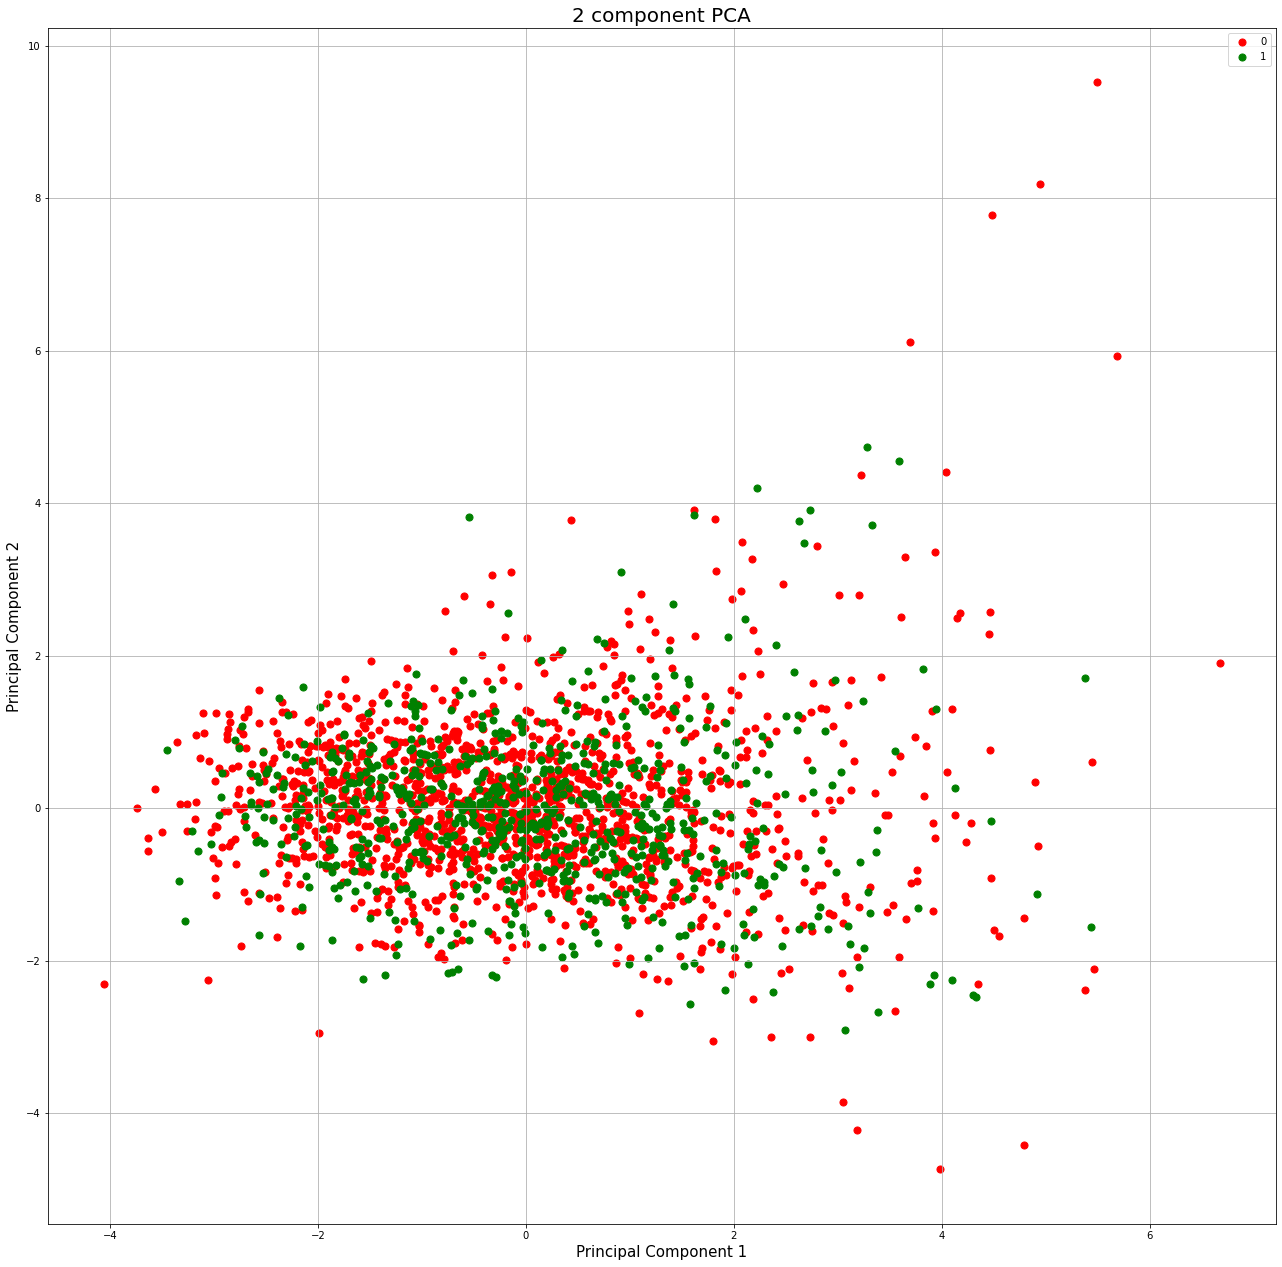

In [20]:
fig = plt.figure(figsize = (22,22))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['MetabolicSyndrome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

On peut voir sur cette ACP qu'il n'y a aucun cluster, et donc pas de valeur beaucoup plus éloigné que les autres. 
Nous allons donc faire une ACP plus précise avec seulement les valeurs: "Age","BMI","BloodGlucose","HDL","Triglycerides"

In [22]:
features_2 = ["Age","BMI","BloodGlucose","HDL","Triglycerides"]
x2 = df.loc[:, features_2].values

x2 = StandardScaler().fit_transform(x2)

In [23]:
mask = ~np.isnan(x2).any(axis=1) & ~np.isinf(x2).any(axis=1)
x2 = x2[mask]

In [25]:
pca = PCA(n_components = 2)

principalComponents2 = pca.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2,
                           columns = ['principal component 1', 'principal component 2'])

In [26]:
finalDf2 = pd.concat([principalDf2, df[['MetabolicSyndrome']]], axis = 1)

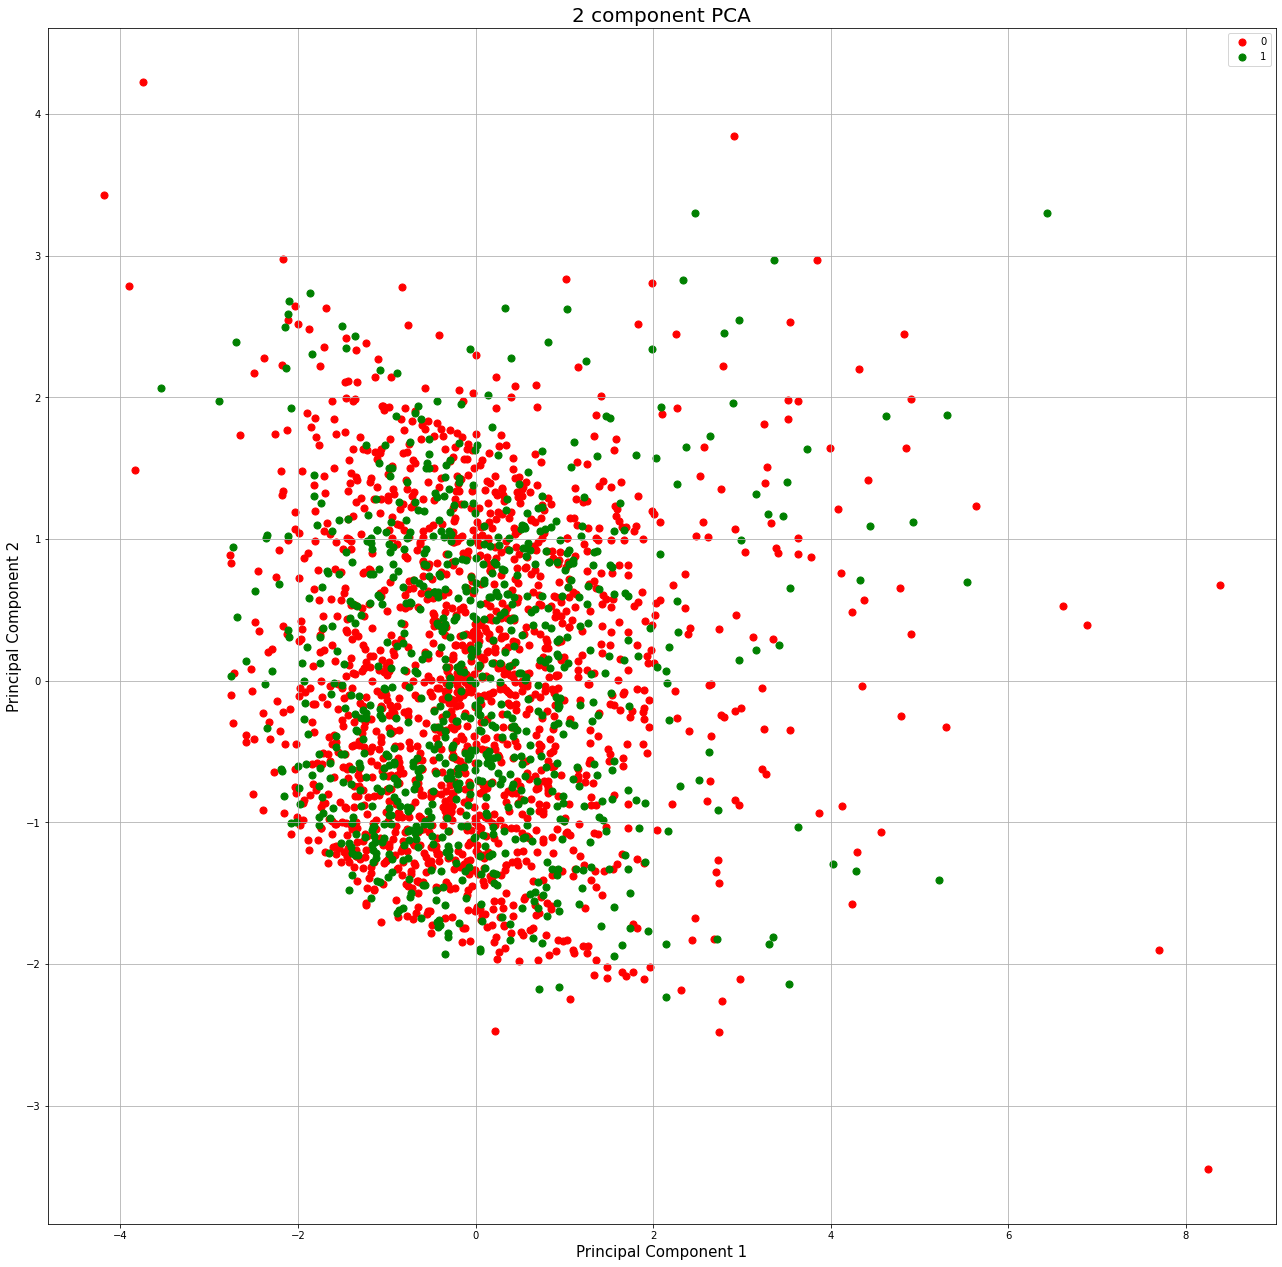

In [27]:
fig = plt.figure(figsize = (22,22))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['MetabolicSyndrome'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

On observe de nouveau une ACP sans grande séparation. Essayons avec 2 éléments dont nous savons qu'ils sont loignés: "BloodGlucose","HDL"

In [28]:
features_3 = ["BloodGlucose","HDL"]
x3 = df.loc[:, features_3].values

x3 = StandardScaler().fit_transform(x3)

In [29]:
mask = ~np.isnan(x3).any(axis=1) & ~np.isinf(x3).any(axis=1)
x3 = x3[mask]

In [30]:
pca = PCA(n_components = 2)

principalComponents3 = pca.fit_transform(x3)
principalDf3 = pd.DataFrame(data = principalComponents3,
                           columns = ['principal component 1', 'principal component 2'])

In [31]:
finalDf3 = pd.concat([principalDf3, df[['MetabolicSyndrome']]], axis = 1)

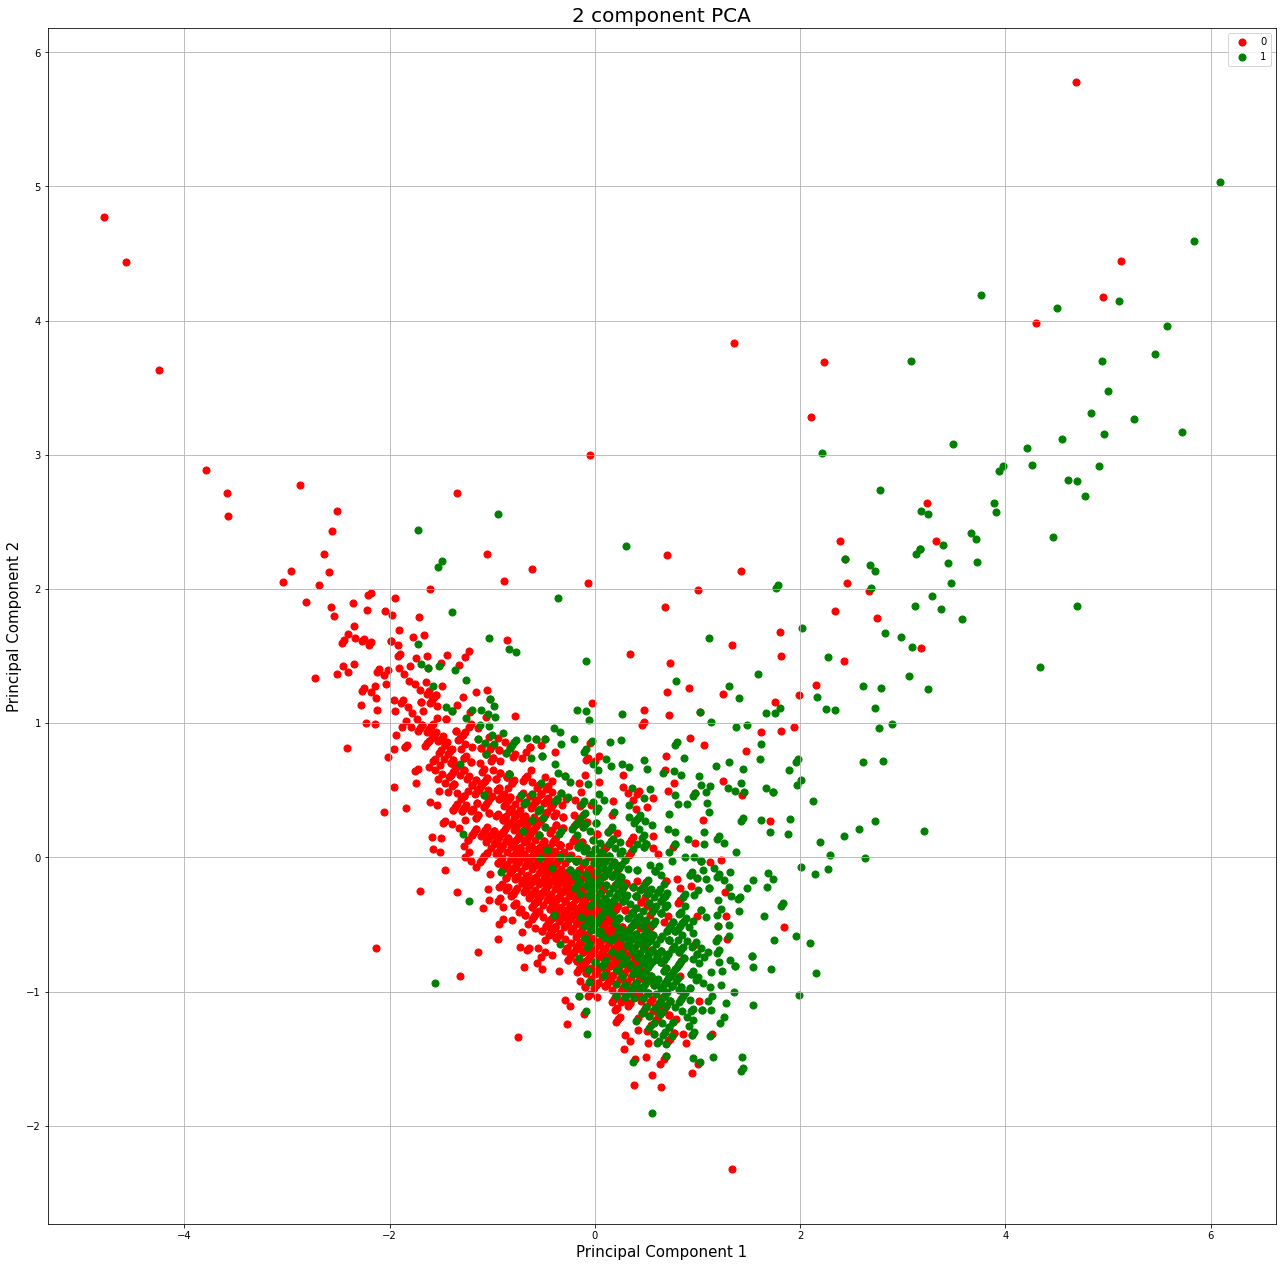

In [32]:
fig = plt.figure(figsize = (22,22))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf3['MetabolicSyndrome'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

On peut voir sur cette PCA une séparation sur la composente principale 1. 
Mainteant on peut essayer avec seulement l'âge

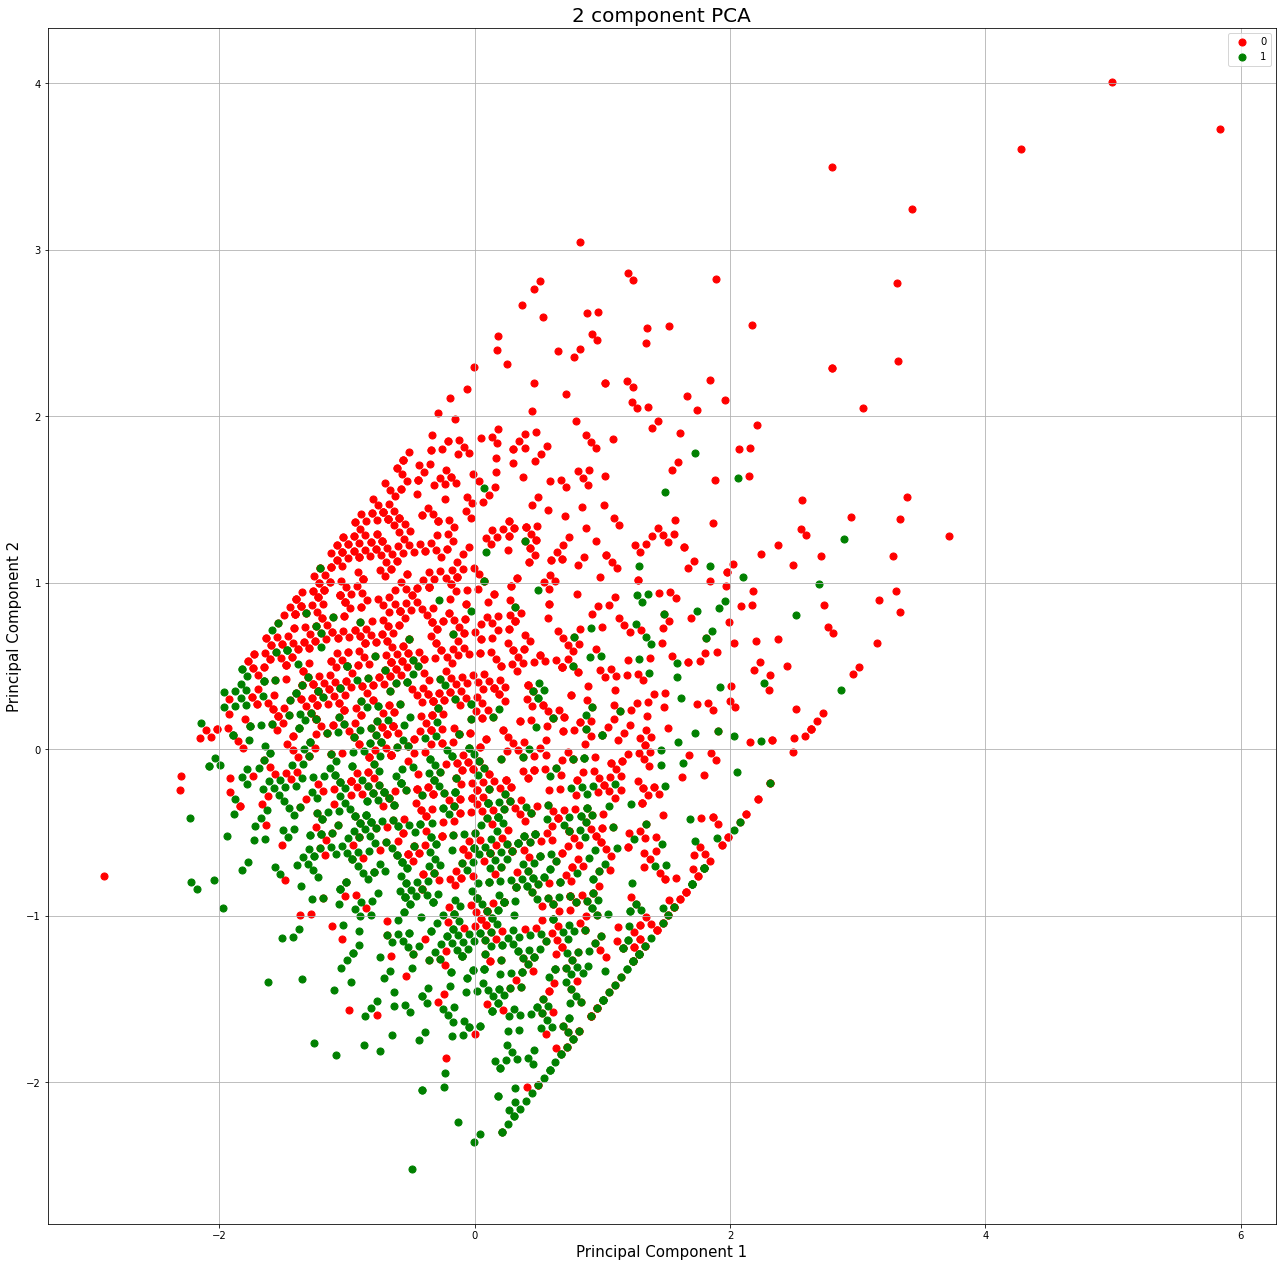

In [37]:
features_4 = ["Age","HDL"]
x4 = df.loc[:, features_4].values

x4 = StandardScaler().fit_transform(x4)

mask = ~np.isnan(x4).any(axis=1) & ~np.isinf(x4).any(axis=1)
x4 = x4[mask]

pca = PCA(n_components =2)

principalComponents4 = pca.fit_transform(x4)
principalDf4 = pd.DataFrame(data = principalComponents4,
                           columns = ['principal component 1', 'principal component 2'])

finalDf4 = pd.concat([principalDf4, df[['MetabolicSyndrome']]], axis = 1)

fig = plt.figure(figsize = (22,22))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf4['MetabolicSyndrome'] == target
    ax.scatter(finalDf4.loc[indicesToKeep, 'principal component 1']
               , finalDf4.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Je crois que le parametre Age fait des choses étranges ahah